# 0: Section Overview

In this section, we will impliment a baseline model. This will provide a basic model against which more complex models can be compared. This comparison will help us to gauge the effectiveness of enhancements or modifications made to the model. Additionally, It sets a standard for evaluating whether more sophisticated models actually provide improvements in predictive performance (in our case, this performance metric is measured as the MSE).

# 1: Necessary Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import random
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import Lasso

# 2: Data Access

We will access the data in the same way throughout the project.

In [48]:
test_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\test.xlsx" # Enter your file path for the train data
train_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\train.xlsx" # Enter your file path for the test data

test_data = pd.read_excel(test_filepath)
train_data = pd.read_excel(train_filepath)

# 3: Implimenting the baseline model: Linear Regression

Initally, let us train the model on the entire training data. Note that we don't require the first 4 columns (date, iso_code, continent and location). Therefore, the first thing we will do is remove these columns.

In [40]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]

print(train_data_string_cols_rem.columns)

print(test_data.shape)
print(train_data.shape)
# iso_codes = test_data['iso_code'].unique()
# random_iso_code = random.choice(iso_codes)
# country_to_display = test_data[test_data['iso_code'] == random_iso_code]
# print(country_to_display)


Index(['Mean_Stringency_Index', 'CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index',
       'days_since', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths',
       'reproduction_rate'],
      dtype='object')
(32431, 14)
(134618, 14)


### Training Data

We will select the relevant columns for our particular model, these being the dependent variable, 'reproduction_rate', and all the covariates, these being 'mean_stringency','CH Index', 'Gov Resp Index', 'Econ Sup Index' and 'days_since'. We also choose to remove any rows with missing values. Later on in the project we will evaluate how we can go about using those rows with missing information.

In [6]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]
covariates = ['Mean_Stringency_Index','CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index','days_since','total_cases','total_deaths','new_cases','new_deaths']
covariates_and_repr = covariates + ['reproduction_rate']
train_data_filtered = train_data_string_cols_rem[covariates_and_repr]
X_train = train_data_filtered[covariates]
y_train = train_data_filtered['reproduction_rate']
print()
print(X_train.shape)
print(len(y_train))



(134618, 9)
134618


### Testing Data

We impliment the same filtering as we did with the training data.

In [27]:
test_data_filtered = test_data_string_cols_rem[covariates_and_repr]
X_test = test_data_filtered[covariates]
y_test = test_data_filtered[['reproduction_rate']]
print()
print(X_test.shape)
print(len(y_test))


(32431, 9)
32431


In [52]:
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

print(X_test)


# Make predictions on the test data
y_pred = linear_model.predict(X_test)

print("y_pred shape:", y_pred.shape)
# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
R_squared = linear_model.score(X_test, y_test)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')
print(f'R^2: {R_squared:.4f}')


       Mean_Stringency_Index  CH_Index  Gov_Resp_Index  Econ_Sup_Index  \
0                      45.37     41.07           35.94             0.0   
1                      45.37     41.07           35.94             0.0   
2                      45.37     41.07           35.94             0.0   
3                      45.37     41.07           35.94             0.0   
4                      62.04     54.17           47.40             0.0   
...                      ...       ...             ...             ...   
32426                  11.11     21.43           21.88            25.0   
32427                  11.11     21.43           21.88            25.0   
32428                  11.11     21.43           21.88            25.0   
32429                  11.11     21.43           21.88            25.0   
32430                  11.11     21.43           21.88            25.0   

       days_since  total_cases  total_deaths  new_cases  new_deaths  
0              74           86           

#### Addressing a TypeError

In [18]:
print(type(y_test))  # Should be pandas.Series or numpy.ndarray
print(type(y_pred))  # Should be pandas.Series or numpy.ndarray

y_test = y_test.squeeze()  # Convert DataFrame to Series
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


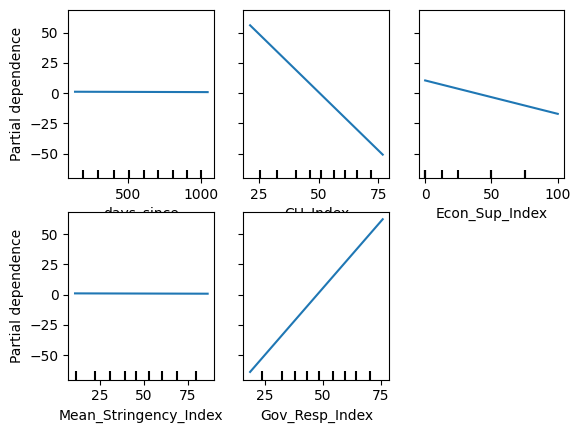

In [20]:


# Assuming 'model' is your trained linear regression model
features = ['days_since', 'CH_Index', 'Econ_Sup_Index', 'Mean_Stringency_Index', 'Gov_Resp_Index']  # Replace with your feature names

# Create partial dependence plots
PartialDependenceDisplay.from_estimator(linear_model, X_test, features, grid_resolution=50)

plt.show()


# 4: Cross-validation

Since we have no hyperparameters to tune in the Baseline Linear model, Cross-validation will not be required. Hence we will not impliment it here.

# 5: Visualising our performance metric for the baseline model

## 5.1: Scatter Plot

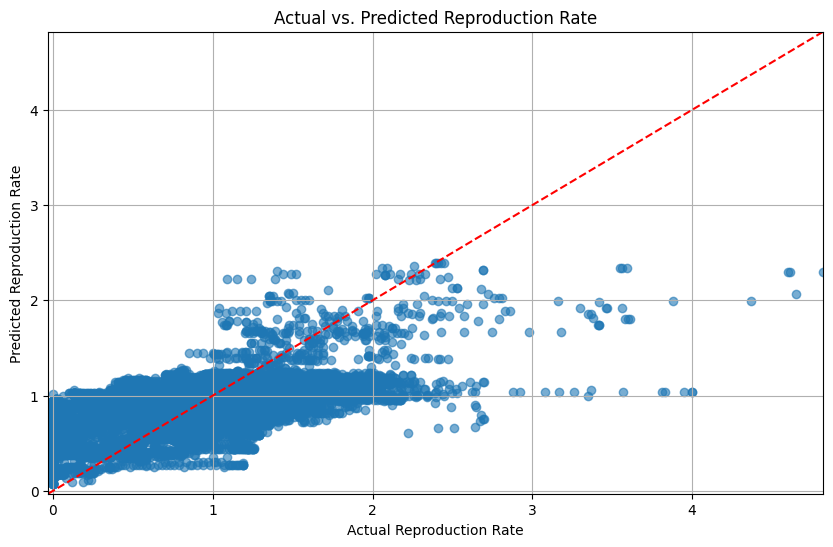

In [21]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Reproduction Rate')
plt.xlabel('Actual Reproduction Rate')
plt.ylabel('Predicted Reproduction Rate')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()

## 5.2: Residuals Plot

A residuals plot shows the residuals (the difference between actual and predicted values) on the y-axis against the predicted values on the x-axis. This can help identify any patterns in the errors.

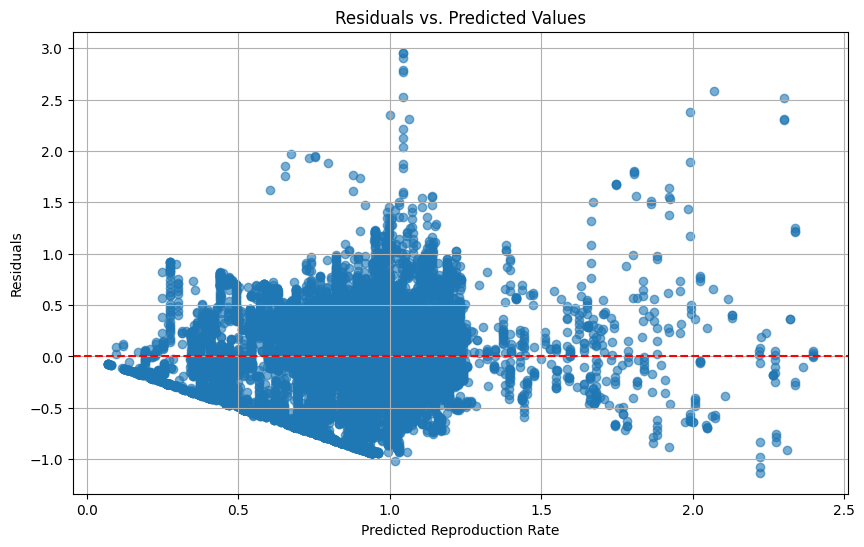

In [22]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Line at 0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Reproduction Rate')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [23]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (32431,)
y_pred shape: (32431,)


## 5.3: Histogram of Residuals

A histogram of the residuals can show the distribution of errors, which should ideally be normally distributed around zero if the model is well-fitted.

When we say that the residuals should be normally distributed around zero, we mean that:
Most of the errors (residuals) should be small and close to zero.
Errors should have a symmetrical distribution, with equal occurrences of positive and negative errors.
What This Implies:

If the residuals are normally distributed around zero, it suggests that:
The model is well-fitted to the data.
There is no systematic bias in the predictions. For instance, if the model consistently overestimates or underestimates the true values, this would show up as a skewed distribution of residuals, rather than a symmetric one around zero.

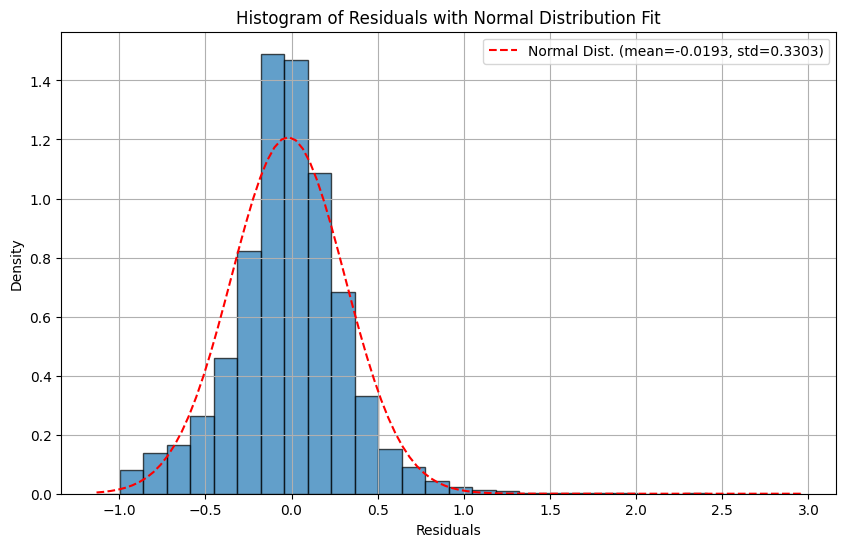

In [49]:

# Assuming you have already calculated residuals

# Calculate the mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Generate values for the normal distribution curve
x = np.linspace(min(residuals), max(residuals), 100)  # 100 values between the min and max of residuals
normal_dist = stats.norm.pdf(x, mean_residuals, std_residuals)  # Probability density function of the normal distribution

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, edgecolor='black', alpha=0.7)  # Use density=True to normalize the histogram
plt.title('Histogram of Residuals with Normal Distribution Fit')
plt.xlabel('Residuals')
plt.ylabel('Density')  # Changing to density instead of frequency

# Plot the normal distribution curve
plt.plot(x, normal_dist, 'r--', label=f'Normal Dist. (mean={mean_residuals:.4f}, std={std_residuals:.4f})')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()


# 6: Evaluating the model performance



## 6.1: Feature importance with regularization 

In [50]:
coefficients = pd.DataFrame(linear_model.coef_, X_train.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                        Coefficient  Absolute Coefficient
Gov_Resp_Index         2.216495e+00          2.216495e+00
CH_Index              -1.931886e+00          1.931886e+00
Econ_Sup_Index        -2.763285e-01          2.763285e-01
Mean_Stringency_Index -3.465247e-03          3.465247e-03
days_since            -3.414299e-04          3.414299e-04
new_deaths            -1.384598e-05          1.384598e-05
total_deaths           1.687026e-07          1.687026e-07
new_cases              1.441729e-08          1.441729e-08
total_cases            5.904141e-09          5.904141e-09


In [51]:
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

lasso_coefficients = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['Coefficient'])
lasso_coefficients['Absolute Coefficient'] = lasso_coefficients['Coefficient'].abs()
lasso_coefficients = lasso_coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(lasso_coefficients)


                        Coefficient  Absolute Coefficient
CH_Index               2.813578e-03          2.813578e-03
Econ_Sup_Index         8.222872e-04          8.222872e-04
Gov_Resp_Index         4.708249e-04          4.708249e-04
days_since            -2.739730e-04          2.739730e-04
new_deaths            -1.282647e-05          1.282647e-05
total_deaths           1.307603e-07          1.307603e-07
new_cases              1.443762e-08          1.443762e-08
total_cases            6.479011e-09          6.479011e-09
Mean_Stringency_Index -0.000000e+00          0.000000e+00


## References